# PC-GMM Composites of SSTA with and without Extreme El Nino events

In [1]:
from importlib import reload
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy as ctp

from latgmm.utils import utenso, preproc, eof, utdata, utstats, metric
import latgmm.geoplot as gpl

plt.style.use("../paper.mplstyle")


In [2]:
# Load weights
weight_month_mean = xr.open_dataset(
    "../output/pcgmm/pcgmm_1stpaperdraft/pcgmm_weights_month_sst.nc"
)['p_c_given_x']
gmm_order = weight_month_mean.attrs['gmm_sort']


In [3]:
# Load data
# =======================================================================================
reload(preproc)
var = 'sst'
climatology = 'month'
f_sst = "../data/reanalysis/monthly/HadISST/sst_hadisst_month_1870-present.nc"

dirpath = "../data/reanalysis/monthly/"
datapath = {
#    'COBE2':   dirpath+"/COBE/sst_cobe2_month_1850-2019.nc",
#    'ErSSTv5': dirpath+"/ERSSTv5/sst_ersstv5_month_1854-present.nc",
#    'HadISST': dirpath+"/HadISST/sst_hadisst_month_1870-present.nc",
    'ORAS5':   dirpath+"/ORAS5/sea_surface_temperature_oras5_single_level_1958_2023_1x1.nc",
    'GODAS':   dirpath+"/GODAS/sst_godas_month_1980-present.nc",
#    'SODA':    dirpath+"/SODA/sst_SODA_month_1980-2017.nc",
#    'ERA5':    dirpath+"/ERA5/sea_surface_temperature_era5_monthly_sp_1940-2022_1.0x1.0.nc",
    'CERA-20c':dirpath+"/CERA-20C/sst_cera20c_1901-2009_r1x1.nc",
}

da4comp = {}
for product, path in datapath.items():
    print(f"Load {product}")
    ds_temp = preproc.process_data(
        path, vars=[var], antimeridian=True,
        lon_range=[130, -70],lat_range=[-31, 32],
        grid_step=1, climatology=climatology, normalization=None
    )
    da = ds_temp[f"{var}a"]
    da.name = product
    da['time'] = np.array(da['time'].data, dtype='datetime64[M]')
    da4comp[product] = da

Load ORAS5
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/tmp/ipykernel_14602/623399822.py:30: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da['time'] = np.array(da['time'].data, dtype='datetime64[M]')
/tmp/ipykernel_14602/623399822.py:30: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting th

Load GODAS
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:
Load CERA-20c
Sort longitudes and latitudes in ascending order, respectively
Process sst:


/tmp/ipykernel_14602/623399822.py:30: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da['time'] = np.array(da['time'].data, dtype='datetime64[M]')
/tmp/ipykernel_14602/623399822.py:30: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting th

Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/tmp/ipykernel_14602/623399822.py:30: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da['time'] = np.array(da['time'].data, dtype='datetime64[M]')
/tmp/ipykernel_14602/623399822.py:30: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting th

## Unweighted composites

In [4]:
n_samples_mean = 100
alpha = 0.05
null_hypothesis = 'neutral'
stattest = 'pos'
multiple_testing= 'dunn'

# Unweighted composites
reload(utenso)
composites_unweight, mask_unweight, composites_null, samples_null_unweight, pvalues_unweight = utenso.get_unweighted_composites(
    da4comp, f_sst, stattest=stattest, null_hypothesis=null_hypothesis,
    enso_types= ['Nino_EP'], n_samples_mean=n_samples_mean, alpha=alpha,
    serial_data=False, multiple_testing=multiple_testing, remove_extreme_events=False
)

Sort longitudes and latitudes in ascending order, respectively
Compute composites for ORAS5
Time points of null-hypothesis: 48
Num of datapoints Nino_EP: 33
Percentile of score for Nino_EP


100%|██████████| 10240/10240 [00:08<00:00, 1215.06it/s]


Compute composites for GODAS
Time points of null-hypothesis: 30
Num of datapoints Nino_EP: 18
Percentile of score for Nino_EP


100%|██████████| 10240/10240 [00:08<00:00, 1182.30it/s]


Compute composites for CERA-20c
Time points of null-hypothesis: 120
Num of datapoints Nino_EP: 69
Percentile of score for Nino_EP


100%|██████████| 10240/10240 [00:08<00:00, 1191.97it/s]


In [6]:
# Unweighted composites
reload(utenso)
composites_unweight_withoutEEN, mask_unweight_withoutEEN, composites_null, samples_null_unweight, pvalues_unweight = utenso.get_unweighted_composites(
    da4comp, f_sst, stattest=stattest, null_hypothesis=null_hypothesis,
    enso_types= ['Nino_EP'], n_samples_mean=n_samples_mean, alpha=alpha,
    serial_data=False, multiple_testing=multiple_testing, remove_extreme_events=True
)

Sort longitudes and latitudes in ascending order, respectively
Compute composites for ORAS5
Time points of null-hypothesis: 48
Num of datapoints Nino_EP: 24
Percentile of score for Nino_EP


100%|██████████| 10240/10240 [00:08<00:00, 1221.16it/s]


Compute composites for GODAS
Time points of null-hypothesis: 30
Num of datapoints Nino_EP: 9
Percentile of score for Nino_EP


100%|██████████| 10240/10240 [00:08<00:00, 1204.17it/s]


Compute composites for CERA-20c
Time points of null-hypothesis: 120
Num of datapoints Nino_EP: 63
Percentile of score for Nino_EP


100%|██████████| 10240/10240 [00:08<00:00, 1181.04it/s]


Plot EP EN with and without EEN

/tmp/ipykernel_14602/1450351421.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../output/plots/pcgmm_composites_sst_extremes.png", dpi=300, bbox_inches='tight')
/tmp/ipykernel_14602/1450351421.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../output/plots/pcgmm_composites_sst_extremes.png", dpi=300, bbox_inches='tight')
/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


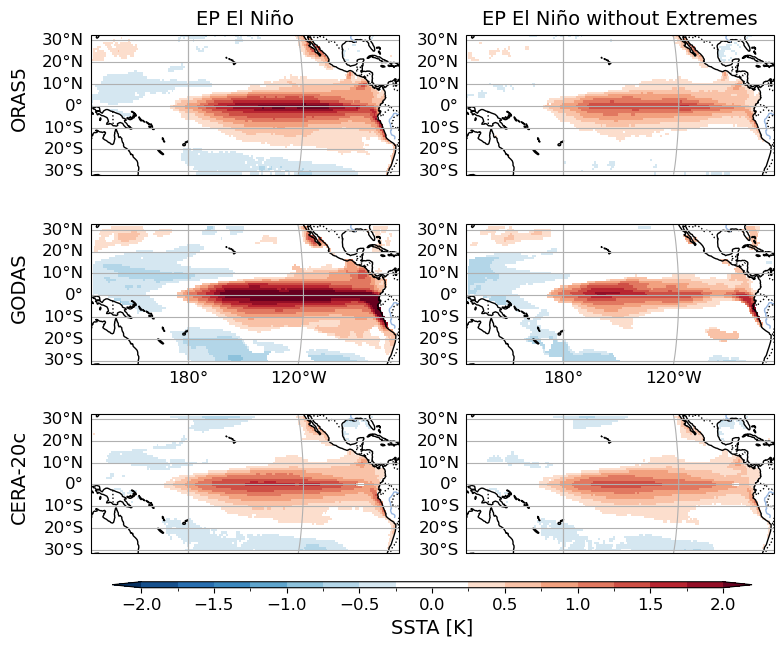

In [9]:
composites = [composites_unweight, composites_unweight_withoutEEN]
masks = [mask_unweight, mask_unweight_withoutEEN]

# Figure
nrows = len(composites_unweight.data_vars)
ncols = 2
fig = plt.figure(figsize=(ncols*4, nrows*2))
gs = fig.add_gridspec(nrows, ncols)
axs = np.empty((nrows, ncols), dtype=object)
central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)
plotspec = dict(cmap='RdBu_r', vmin=-2, vmax=2, step=.25, centercolor='#FFFFFF')

for i, product in enumerate(composites_unweight.data_vars):
    for j in range(ncols):
        # ENSO flavor composites
        comp = composites[j][product].isel(classes=0)
        mask = masks[j][product].isel(classes=0)
        comp_stat = comp.where(mask, other=np.nan)
        # Plot
        ax = fig.add_subplot(gs[i, j], projection=proj)
        axs[i,j] = ax
        im = gpl.plot_map(comp_stat, central_longitude=central_longitude, ax=ax,
                          bar='discrete', add_bar=False, **plotspec)
        # Remove labels
        im['gl'].top_labels = False
        im['gl'].right_labels = False
        if i+1 == nrows-1:
            im['gl'].bottom_labels = True
        else:
            im['gl'].bottom_labels = False
        
        if j == 0:
            ax.text(-0.2, 0.55, rf"{product}", va='bottom', ha='center',
                    rotation='vertical', rotation_mode='anchor',
                    transform=ax.transAxes, fontsize=14) 

# Shared colorbar
cbar_ax = fig.add_axes([0.15, 0.0, 0.8, 0.01])
cbar = fig.colorbar(im['im'], orientation='horizontal', shrink=0.3,
                    cax=cbar_ax, extend='both')
cbar.set_label(f"SSTA [K]", size=14)

        
axs[0,0].set_title(f"EP El Niño", fontsize=14)
axs[0,1].set_title(f"EP El Niño without Extremes", fontsize=14)


if True:
    plt.savefig("../output/plots/pcgmm_composites_sst_extremes.png", dpi=300, bbox_inches='tight')